<center> <b>UCGIS I-GUIDE Community Champion Project</b> </center>


# 2020 Census and Differential Privacy
<i>Yue Lin, The Ohio State University</i>

Census data are one of the largest public data sources in the United States, which contain detailed demographic information and have widely been used to redraw voting districts, direct federal funding, and inform policymaking and research. [Title 13 of the United States Code](https://www.census.gov/history/www/reference/privacy_confidentiality/title_13_us_code.html#:~:text=People%20sworn%20to%20uphold%20Title,is%20a%20serious%20federal%20crime) states that federal agencies are not permitted to release personally identifiable information from the census. However, this becomes increasingly challenging because the advances in computing power and the availability of commercial data sets have made it easier to link ostensibly anonymized census data to specific individuals. 

To enhance individual privacy protection in the 2020 Census, the Census Bureau established a privacy protection system based on a mathematical concept known as [differential privacy](https://en.wikipedia.org/wiki/Differential_privacy). Developed at Microsoft Research, differential privacy has become the gold standard for data privacy in various applications from both private and public sectors. This notebook describes the use of differential privacy for census data as well as how it will affect the census data.

**Related Topics in GIS&T Body of Knowledge:** [United States Census Data](https://doi.org/10.22224/gistbok/2019.1.8), [Location Privacy](http://dx.doi.org/10.22224/gistbok/2016.3.2)

## Notebook Outline
- [Differential Privacy for Census Data](#sec1)
- [How will Differential Privacy Affect the Utility of Census Data?](#sec2)
- [References](#ref)

<a id='sec1'></a>
## Differential Privacy for Census Data
Differential privacy seeks to conceal the presence or absence of any individual (or small groups of individuals) in a database while preserving statistical utility. A general way to achieve differential privacy is to add “noise” to the collected data. In the 2020 United States Census, statistical noise is sampled from a Gaussian distribution and added to census data at each geographical level (from the nation, to states, down to census blocks). The amount of statistical noise added is controlled by a “privacy loss budget”, which defines the maximum amount of privacy loss that can occur upon the release of census data. As the privacy loss budget increases, the added noise decreases, implying that the census data will be more accurate, but the likelihood of private information being exploited using the census data also increases.

<img src='./figs/dp.png' width='600'/>

Source: [Disclosure Avoidance for the 2020 Census: An Introduction.](https://www2.census.gov/library/publications/decennial/2020/2020-census-disclosure-avoidance-handbook.pdf)

<a id='sec2'></a>
## How will Differential Privacy Affect the Utility of Census Data?

block group level: before and after

In [3]:
import pandas as pd

filename_df = 'data/nhgis_ppdd_20210608_blck_grp.csv'
df = pd.read_csv(filename_df)
df = df[df['state']==39]
df.to_csv('data/nhgis_ppdd_blk_oh.csv',index=False)

In [4]:
df

,gisjoin,name,state,H72001_dp,H72002_dp,H72003_dp,H72004_dp,H72005_dp,H72006_dp,H72007_dp,...,H80006_sf,H80007_sf,H80008_sf,H80009_sf,H80010_sf,IFE001_sf,IFE002_sf,IFE003_sf,BG,black_sf
0,G39000107701001,Block Group 1,39,1318,1296,1289,2,3,1,0,...,0,0,0,0,0,599,521,78,NaN,8
1,G39000107701002,Block Group 2,39,1370,1348,1330,12,3,3,0,...,0,49,0,0,49,608,540,68,G39000107701002,12
2,G39000107701003,Block Group 3,39,1262,1247,1233,2,8,0,0,...,0,0,0,0,0,589,532,57,G39000107701003,6
3,G39000107701004,Block Group 4,39,915,902,889,7,2,0,0,...,0,0,0,0,0,414,358,56,G39000107701004,2
4,G39000107702001,Block Group 1,39,1391,1369,1352,9,1,4,0,...,0,0,0,0,0,579,498,81,G39000107702001,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,G39017509384003,Block Group 3,39,704,686,622,9,0,6,0,...,0,0,0,0,0,309,274,35,G39017509384003,4
9234,G39017509384004,Block Group 4,39,867,863,810,2,0,8,0,...,0,0,0,0,0,376,356,20,G39017509384004,1
9235,G39017509385001,Block Group 1,39,1121,1107,1094,5,0,1,0,...,0,0,0,0,0,437,420,17,G39017509385001,7
9236,G39017509385002,Block Group 2,39,1132,1122,1105,5,0,6,3,...,0,0,0,0,0,566,518,48,G39017509385002,2


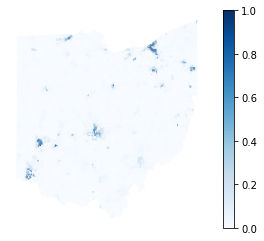

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt  # Graphics

filename_hist = 'data/nhgis_ppdd_blck_grp_oh.csv'
df = pd.read_csv(filename_hist)
df['BG'] = df['gisjoin'].astype(str).str[1:3] + df['gisjoin'].astype(str).str[4:7] + df['gisjoin'].astype(str).str[8:]

filename_gdf = 'data/tl_2010_39_bg10.shp'
gdf = gpd.read_file(filename_gdf)

df['black_sf'] = df['H72004_sf'] / df['H72001_sf']
merged = gdf.set_index('GEOID10').join(df.set_index('BG'))
fig = merged.plot(column='black_sf', legend=True, cmap='Blues')
fig.set_axis_off()

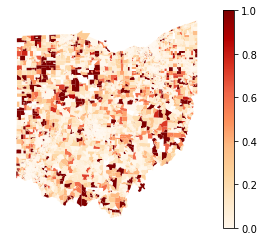

In [24]:
df['black'] = abs(df['H72004_dp'] / df['H72001_dp'] - df['H72004_sf'] / df['H72001_sf']) / (df['H72004_dp'] / df['H72001_dp'] + df['H72004_sf'] / df['H72001_sf'])
merged = gdf.set_index('GEOID10').join(df.set_index('BG'))
fig = merged.plot(column='black', legend=True, cmap='OrRd')
fig.set_axis_off()

<a id='ref'></a>
## References
<span id="fn1"> Armstrong, M. P., Rushton, G., & Zimmerman, D. L. (1999). Geographically masking health data to preserve confidentiality. Statistics in Medicine, 18(5), 497-525. </span>

<span id="fn2"> Kwan, M. P., Casas, I., & Schmitz, B. (2004). Protection of geoprivacy and accuracy of spatial information: How effective are geographical masks?. Cartographica: The International Journal for Geographic Information and Geovisualization, 39(2), 15-28. </span>

<span id="fn3"> Cassa, C. A., Wieland, S. C., & Mandl, K. D. (2008). Re-identification of home addresses from spatial locations anonymized by Gaussian skew. International Journal of Health Geographics, 7(1), 1-9. </span>

<span id="fn4"> Hampton, K. H., Fitch, M. K., Allshouse, W. B., Doherty, I. A., Gesink, D. C., Leone, P. A., ... & Miller, W. C. (2010). Mapping health data: improved privacy protection with donut method geomasking. American Journal of Epidemiology, 172(9), 1062-1069. </span>